In [ ]:
# 1️⃣ Random Forest vs Decision Tree

# | Feature                | Decision Tree                                       | Random Forest                                                       |
# | ---------------------- | --------------------------------------------------- | ------------------------------------------------------------------- |
# | **Basic idea**         | Single tree splits data based on feature thresholds | Ensemble of many trees trained on random subsets of data & features |
# | **Overfitting**        | High, especially on small datasets                  | Much lower due to averaging many trees                              |
# | **Accuracy**           | Moderate                                            | Higher, more robust                                                 |
# | **Feature importance** | Can be unstable                                     | More reliable (averaged over many trees)                            |
# | **Interpretability**   | Very high (easy to visualize single tree)           | Lower (hard to visualize all trees)                                 |
# | **Training time**      | Fast                                                | Slower (multiple trees)                                             |

# Decision Trees do NOT need MinMaxScaler (or any feature scaling).
# Decision Trees work by splitting data based on thresholds, not distances.

# Algorithms that DO NOT need scaling

# DecisionTreeClassifier
# RandomForest
# ExtraTrees
# Gradient Boosting (XGBoost, LightGBM, CatBoost)

# Classifier: Predict if an email is spam or not spam → output: "spam" or "not spam"

# Regressor: Predict the price of a house → output: 250000

# | Class                    | Task Type      | Output                               |
# | ------------------------ | -------------- | ------------------------------------ |
# | `RandomForestClassifier` | Classification | Discrete labels (categories/classes) |
# | `RandomForestRegressor`  | Regression     | Continuous numeric values            |

# | Class      | Typical Loss / Evaluation Metrics                       |
# | ---------- | ------------------------------------------------------- |
# | Classifier | Accuracy, Precision, Recall, F1-score, ROC-AUC          |
# | Regressor  | Mean Squared Error (MSE), Mean Absolute Error (MAE), R² |




In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # A Random Forest is a popular machine learning algorithm used for classification and regression. It’s called a “forest” because it combines many decision trees to make better predictions.
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../../resource/Heart_Disease_Prediction.csv")
df.info()
## Cleaning the column (Optional)
df.columns = df.columns.str.strip()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [4]:
df['Heart Disease'] = df['Heart Disease'].map({"Presence": 1, "Absence": 0}) # For making easy for labeling
num_cols = ["Sex", "BP", "Cholesterol", "Max HR", "ST depression"]
cat_cols = ["Sex", "Chest pain type", "FBS over 120", "EKG results", "Exercise angina", "Slope of ST", "Number of vessels fluro", "Thallium"]

# Removing outliers depends on your data type, model, and goal. There’s no one-size-fits-all, but I can break it down into the most common and effective approaches.
# ✅ Summary Table
# | Method              | Best for    | Pros                   | Cons                          |
# | ------------------- | ----------- | ---------------------- | ----------------------------- |
# | IQR                 | Skewed data | Simple, non-parametric | Ignores multivariate outliers |
# | Z-Score             | Normal data | Easy threshold         | Sensitive to mean/std         |
# | Capping/Winsorizing | All         | Keeps data size        | May distort distribution      |
# | Transformation      | Skewed data | Reduces impact         | Changes scale/interpretation  |
# | Model-based         | ML models   | No need to remove      | Doesn't explain outliers      |

# What is Skewed Data?

# Skewed data is when a dataset is not symmetric — the distribution of values leans more to one side.

# Symmetric distribution: Mean ≈ Median ≈ Mode (like a normal/Gaussian distribution)

# Skewed distribution: Mean ≠ Median ≠ Mode, data “leans” to left or right

# Tree-based models (Random Forest, XGBoost) are less affected by skewness.

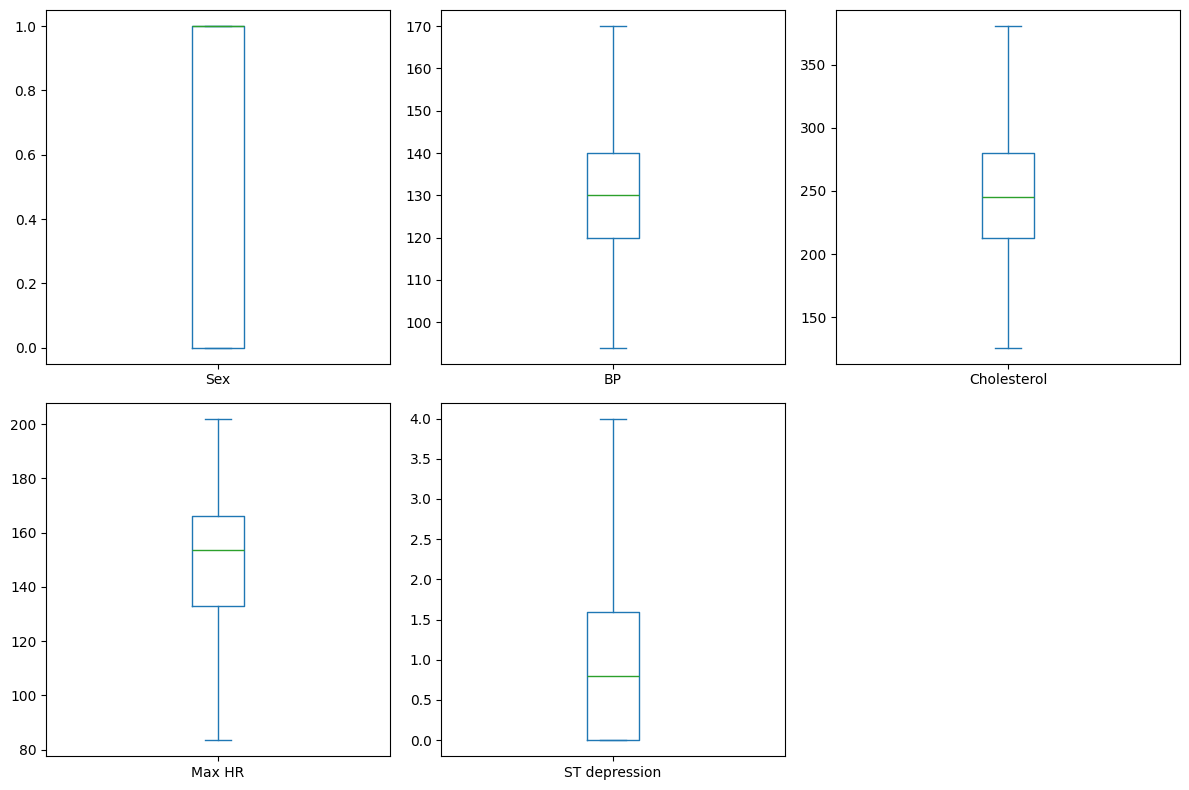

In [5]:
## Removing Outliers using IQR
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5*IQR
    high = Q3 + 1.5*IQR
    df[col] = np.where(df[col] < low, low, np.where(df[col] > high, high, df[col]))

df[num_cols].plot(kind="box", figsize=(12, 8), subplots=True, layout=(2, 3))
plt.tight_layout()
plt.show()

In [8]:
## As We Removed the outliers lets make or train a model using RandomForestClassifier
X = df.drop("Heart Disease", axis=1)
y = df["Heart Disease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
preds = model.predict(X_test)


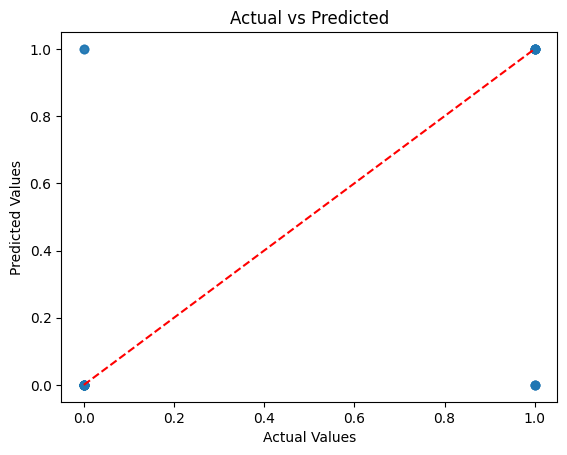

In [11]:
######## Lets Plot
plt.scatter(y_test, preds, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

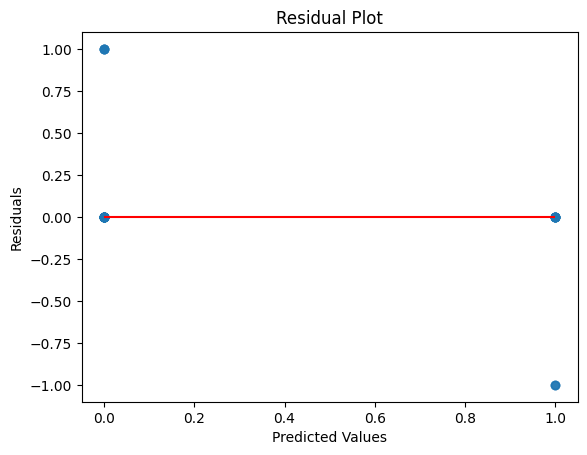

In [12]:
residuals = y_test - preds
plt.scatter(preds, residuals, alpha=0.5)
plt.hlines(y=0, xmin=min(preds), xmax=max(preds), color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

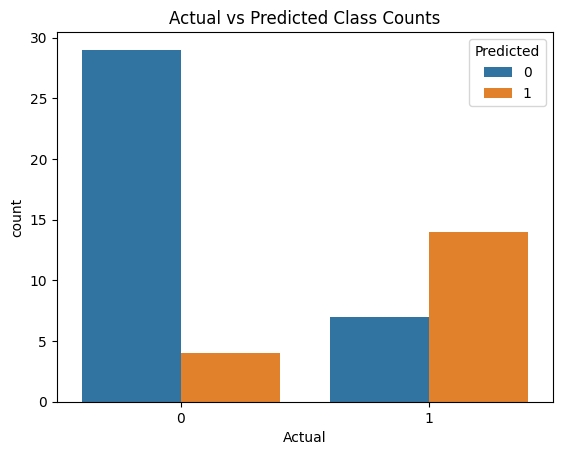

In [13]:
import seaborn as sns

df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': preds})
sns.countplot(x='Actual', hue='Predicted', data=df_compare)
plt.title("Actual vs Predicted Class Counts")
plt.show()

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))


              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.78      0.67      0.72        21

    accuracy                           0.80        54
   macro avg       0.79      0.77      0.78        54
weighted avg       0.79      0.80      0.79        54

